## Importing Important Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

In [3]:
data = pd.read_table('hiRe.csv') 

In [4]:
features = data.iloc[:,:6]
features #display features

,m,r0,r1,Cp,f,L
0,0.4669,0.7390,0.4153,0.6924,3.271,170.07
1,0.3551,0.5458,0.0085,0.5525,4.576,229.35
2,0.3805,0.3220,0.2459,0.6288,5.051,234.61
3,0.4151,0.6000,0.1798,0.6153,3.044,168.40
4,0.4339,0.3322,0.4661,0.6364,5.407,244.53
5,0.3627,0.6780,0.0169,0.6263,5.703,254.75
6,0.3958,0.5661,0.2034,0.5856,4.161,211.13
7,0.4619,0.4746,0.1186,0.5551,3.153,178.62
8,0.4924,0.3729,0.1695,0.6542,3.212,171.22
9,0.4364,0.2102,0.3390,0.6008,5.763,260.08


In [5]:
target = data.iloc[:,-1]    #drag coefficient target values
pd.DataFrame(target)

,Cdv
0,0.018687
1,0.017841
2,0.017764
3,0.018565
4,0.017830
5,0.017939
6,0.017914
7,0.018444
8,0.018617
9,0.017694


In [6]:
df = pd.concat([features,target],axis=1)  #concatinating the feature and target values
df

,m,r0,r1,Cp,f,L,Cdv
0,0.4669,0.7390,0.4153,0.6924,3.271,170.07,0.018687
1,0.3551,0.5458,0.0085,0.5525,4.576,229.35,0.017841
2,0.3805,0.3220,0.2459,0.6288,5.051,234.61,0.017764
3,0.4151,0.6000,0.1798,0.6153,3.044,168.40,0.018565
4,0.4339,0.3322,0.4661,0.6364,5.407,244.53,0.017830
5,0.3627,0.6780,0.0169,0.6263,5.703,254.75,0.017939
6,0.3958,0.5661,0.2034,0.5856,4.161,211.13,0.017914
7,0.4619,0.4746,0.1186,0.5551,3.153,178.62,0.018444
8,0.4924,0.3729,0.1695,0.6542,3.212,171.22,0.018617
9,0.4364,0.2102,0.3390,0.6008,5.763,260.08,0.017694


In [7]:
df.describe().round(decimals=4) #describing data 

,m,r0,r1,Cp,f,L,Cdv
count,60.0000,60.0000,60.0000,60.0000,60.0000,60.0000,60.0000
mean,0.4245,0.5060,0.2492,0.6257,4.2571,208.5138,0.0183
std,0.0443,0.1747,0.1483,0.0439,1.0261,34.2012,0.0006
min,0.3500,0.2000,0.0000,0.5500,2.5000,144.1300,0.0175
25%,0.3875,0.3602,0.1250,0.5900,3.3752,178.3925,0.0178
50%,0.4224,0.5102,0.2500,0.6250,4.2500,210.9250,0.0181
75%,0.4625,0.6500,0.3750,0.6625,5.1248,239.5475,0.0185
max,0.5000,0.8000,0.5000,0.7000,6.0000,273.0800,0.0210


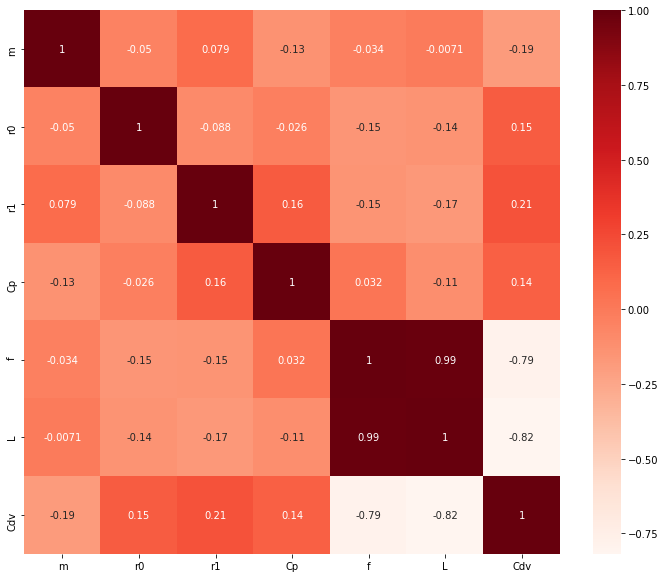

In [8]:
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
#Correlation with output variable
cor_target = abs(cor["Cdv"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

f      0.788478
L      0.818300
Cdv    1.000000
Name: Cdv, dtype: float64

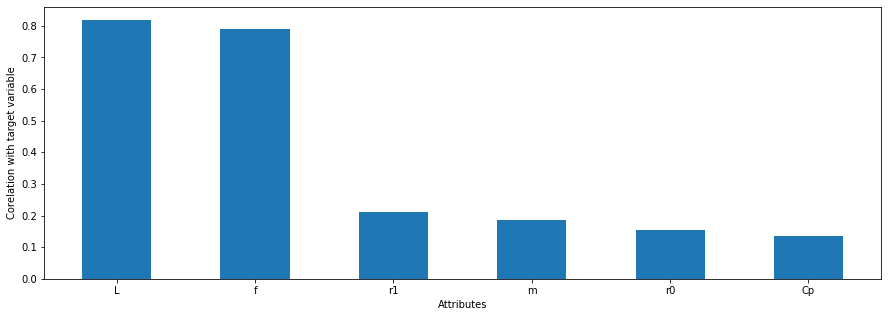

In [10]:
corr = df.corr('pearson')   #to get the corelation between features and target variable
corrs = [abs(corr[attr]['Cdv']) for attr in list(features)]
l = list(zip(corrs,list(features)))
l.sort(key = lambda x : x[0], reverse=True)
corrs, labels = list(zip((*l)))
index = np.arange(len(labels))
plt.figure(figsize = (15,5))
plt.bar(index, corrs, width =0.5)
plt.xlabel('Attributes')
plt.ylabel('Corelation with target variable')
plt.xticks(index,labels)
plt.show()

In [11]:
X = df['L'].values #L has highest corelation with Cdv
Y = df['Cdv'].values

In [12]:
print(Y[:5]) #printing values

[0.018687 0.017841 0.017764 0.018565 0.01783 ]


In [13]:
x_scaler = MinMaxScaler() #scaling the target values
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[:,-1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[:,-1]

In [14]:
print(Y[:5])

[0.34460227 0.10426136 0.08238636 0.30994318 0.10113636]


## Split the data

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size =0.2) #splitting data into train and test set

In [16]:
def error(m,x,c,t):   
    N = x.size
    e = sum(((m*x + c) - t)**2)
    return e*1/(2*N)  #evaluating error 

In [17]:
def update(m,x,c,t,learning_rate):
    grad_m = sum(2*((m*x + c)-t)*x)
    grad_c = sum(2*((m*x + c)-t))
    m = m - grad_m*learning_rate
    c = c -grad_c*learning_rate
    return m,c #updating hyperparameter

In [18]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m,x,c,t)
        if e<error_threshold:
            print('Error less then gradient descent, Stopping gradient descent.')
            break
        error_values.append(e)
        m,c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values, mc_values #learning algorithm

In [19]:
%%time 
init_m = 0
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001
m,c,error_values,mc_values = gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)

Wall time: 49.4 ms


## Visualization of trainning model

In [20]:
mc_values_anim = mc_values[0:250:5]

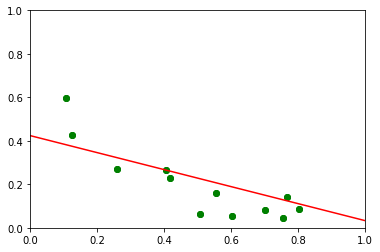

In [21]:
fig, ax = plt.subplots()
ln, = plt.plot([],[],'ro-', animated = True)

def init():
    plt.scatter(xtest,ytest,color = 'g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,

def update_frame(frame):
    m,c = mc_values_anim[frame]
    x1,y1 = -0.5, m*-.5 + c
    x2,y2 = 1.5, m*1.5 + c
    ln.set_data([x1,x2],[y1,y2])
    return ln,

anim = FuncAnimation(fig, update_frame, frames = range(len(mc_values_anim)), init_func = init, blit = True)

HTML(anim.to_html5_video())

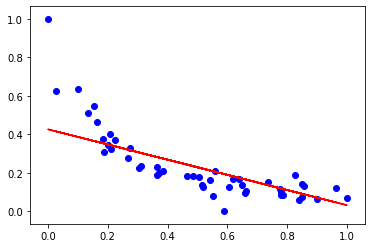

In [22]:
plt.scatter(xtrain,ytrain,color='b')
plt.plot(xtrain,(m*xtrain + c), color='r')

Text(0, 0.5, 'Error')

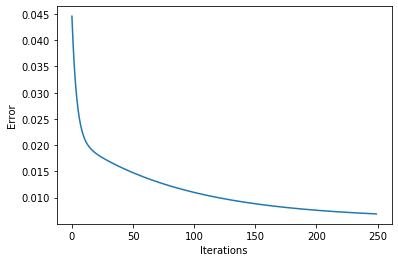

In [23]:
plt.plot(np.arange(len(mc_values)),error_values)
plt.xlabel('Iterations')
plt.ylabel('Error')

## Prediction

In [24]:
predicted = (m*xtest) + c

In [25]:
mean_squared_error(ytest, predicted)

0.0092503843599972

In [26]:
p = pd.DataFrame(list(zip(xtest,ytest,predicted)),columns = ['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.108259,0.597727,0.383267
1,0.754556,0.043182,0.128333
2,0.418224,0.227841,0.261000
3,0.768592,0.141477,0.122797
4,0.126095,0.426136,0.376231


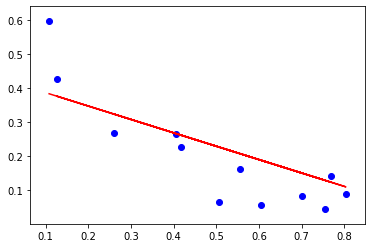

In [27]:
plt.scatter(xtest, ytest, color ='b')
plt.plot(xtest, predicted, color ='r')

## Prediction of Drag Coefficient

In [28]:
predicted = predicted.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

xtest_scaled = xtest_scaled[:,-1]
ytest_scaled = ytest_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]

p = pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns = ["x","target_y","predicted_y"])
p = p.round(decimals =2)
p.head()

,x,target_y,predicted_y
0,158.09,0.02,0.02
1,241.43,0.02,0.02
2,198.06,0.02,0.02
3,243.24,0.02,0.02
4,160.39,0.02,0.02


### From above table we can say that we can succesfully predict the Volumetric coefficient of drag for given reynolds number for different features for random envolope. (Here we have taken Volume of envolope as constant)